In [68]:
import numpy as np
import matplotlib.pyplot as plt
import EarlyStopping as es

In [84]:

# All examples are from Eq. 5.6 Stankewitz 2020
D = 500
indices = np.arange(D)+1
lambda_ = 1/(np.sqrt(indices))
lambda_matrix = np.diag(lambda_)
sigma = 0.1
eps   = np.random.normal(0, sigma, D)


In [85]:
# supersmooth signal
mu = 5*np.exp(-0.1*indices)
f = lambda_matrix @ mu
Y = f + eps

iter = 30
lw1 = es.landweber(lambda_matrix, Y, mu)
lw1.landw(iter)
est1 = lw1.landw_estimate


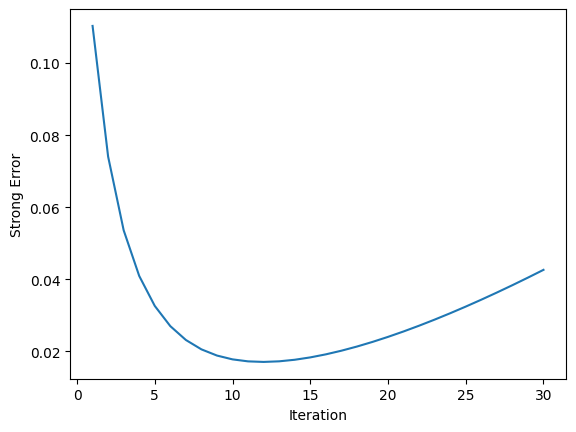

In [86]:
plt.plot(range(1, iter+1), lw1.mse)  

plt.xlabel('Iteration')
plt.ylabel('Strong Error')
plt.show()

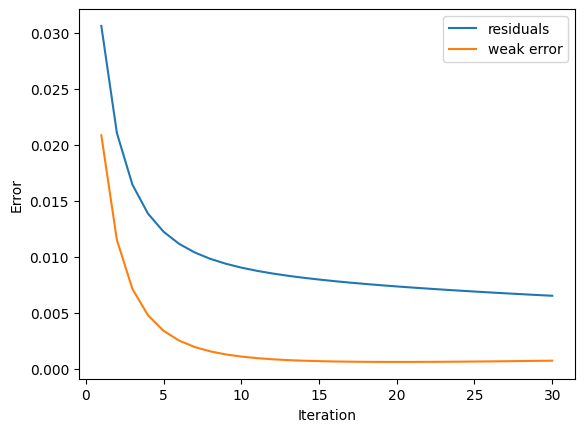

In [97]:
plt.plot(range(1, iter+1), lw1.residuals[1:], label='residuals')  
plt.plot(range(1, iter+1), lw1.mse_weak, label='weak error')  

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

In [94]:
# smooth signal
mu = 5000*np.abs(np.sin(0.01*indices))*indices**(-1.6)
f = lambda_matrix @ mu
Y = f + eps

iter = 30
lw2 = es.landweber(lambda_matrix, Y, mu)
lw2.landw(iter)
est2 = lw2.landw_estimate

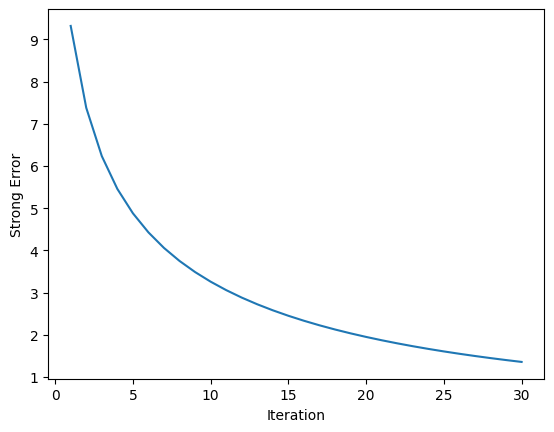

In [95]:
plt.plot(range(1, iter+1), lw2.mse)  

plt.xlabel('Iteration')
plt.ylabel('Strong Error')
plt.show()

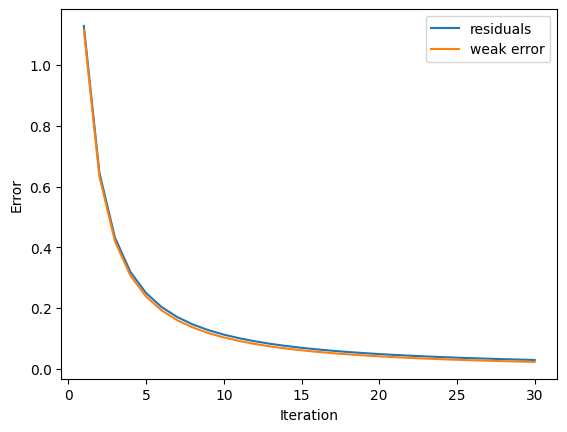

In [98]:
plt.plot(range(1, iter+1), lw2.residuals[1:], label='residuals')  
plt.plot(range(1, iter+1), lw2.mse_weak, label='weak error')  

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

In [100]:
# rough signal
mu = 250*np.abs(np.sin(0.002*indices))*indices**(-0.8)
f = lambda_matrix @ mu
Y = f + eps

iter = 100
lw3 = es.landweber(lambda_matrix, Y, mu)
lw3.landw(iter)

estimate = lw3.landw_estimate


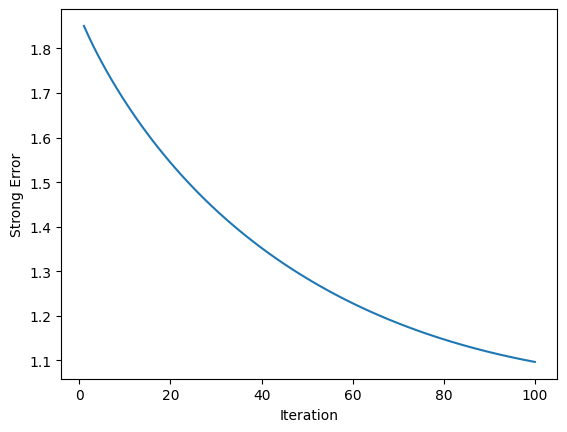

In [101]:
plt.plot(range(1, iter+1), lw3.mse)  

plt.xlabel('Iteration')
plt.ylabel('Strong Error')
plt.show()

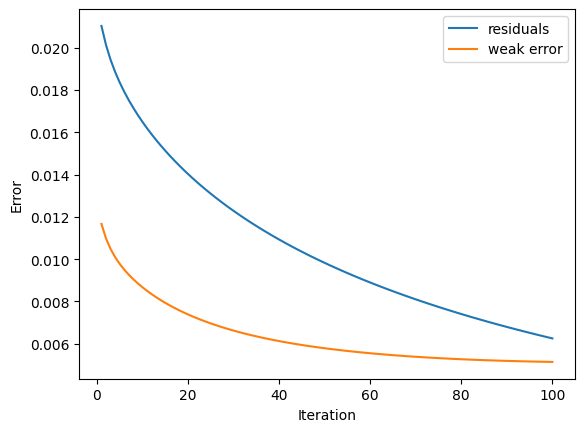

In [102]:
plt.plot(range(1, iter+1), lw3.residuals[1:], label='residuals')  
plt.plot(range(1, iter+1), lw3.mse_weak, label='weak error')  

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()